In [103]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [104]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from termcolor import colored

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

import warnings
warnings.filterwarnings("ignore")

print(colored('\nAll libraries imported succesfully.', 'blue'))


All libraries imported succesfully.


In [105]:
df = pd.read_csv('/content/drive/MyDrive/DATASETS/Cardiovascular_Disease_Dataset/Cardiovascular_Disease_Dataset.csv')
df.head()

,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
0,103368,53,1,2,171,0,0,1,147,0,5.3,3,3,1
1,119250,40,1,0,94,229,0,1,115,0,3.7,1,1,0
2,119372,49,1,2,133,142,0,0,202,1,5.0,1,0,0
3,132514,43,1,0,138,295,1,1,153,0,3.2,2,2,1
4,146211,31,1,1,199,0,0,2,136,0,5.3,3,2,1


In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   patientid          1000 non-null   int64  
 1   age                1000 non-null   int64  
 2   gender             1000 non-null   int64  
 3   chestpain          1000 non-null   int64  
 4   restingBP          1000 non-null   int64  
 5   serumcholestrol    1000 non-null   int64  
 6   fastingbloodsugar  1000 non-null   int64  
 7   restingrelectro    1000 non-null   int64  
 8   maxheartrate       1000 non-null   int64  
 9   exerciseangia      1000 non-null   int64  
 10  oldpeak            1000 non-null   float64
 11  slope              1000 non-null   int64  
 12  noofmajorvessels   1000 non-null   int64  
 13  target             1000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 109.5 KB


In [107]:
df.describe()

,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
count,1.000000e+03,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,5.048704e+06,49.24200,0.765000,0.980000,151.747000,311.447000,0.296000,0.748000,145.477000,0.498000,2.707700,1.540000,1.222000,0.580000
std,2.895905e+06,17.86473,0.424211,0.953157,29.965228,132.443801,0.456719,0.770123,34.190268,0.500246,1.720753,1.003697,0.977585,0.493805
min,1.033680e+05,20.00000,0.000000,0.000000,94.000000,0.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.536440e+06,34.00000,1.000000,0.000000,129.000000,235.750000,0.000000,0.000000,119.750000,0.000000,1.300000,1.000000,0.000000,0.000000
50%,4.952508e+06,49.00000,1.000000,1.000000,147.000000,318.000000,0.000000,1.000000,146.000000,0.000000,2.400000,2.000000,1.000000,1.000000
75%,7.681877e+06,64.25000,1.000000,2.000000,181.000000,404.250000,1.000000,1.000000,175.000000,1.000000,4.100000,2.000000,2.000000,1.000000
max,9.990855e+06,80.00000,1.000000,3.000000,200.000000,602.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,1.000000


In [108]:
df.isna().sum()

patientid            0
age                  0
gender               0
chestpain            0
restingBP            0
serumcholestrol      0
fastingbloodsugar    0
restingrelectro      0
maxheartrate         0
exerciseangia        0
oldpeak              0
slope                0
noofmajorvessels     0
target               0
dtype: int64

In [109]:
age_range = f"Age Range: {df['age'].min()} - {df['age'].max()}"
print(age_range)

Age Range: 20 - 80


In [110]:
gender_count = df['gender'].value_counts()
print(gender_count)

1    765
0    235
Name: gender, dtype: int64


In [111]:
chest_pain_counts = df['chestpain'].value_counts()
print(chest_pain_counts)

0    420
2    312
1    224
3     44
Name: chestpain, dtype: int64


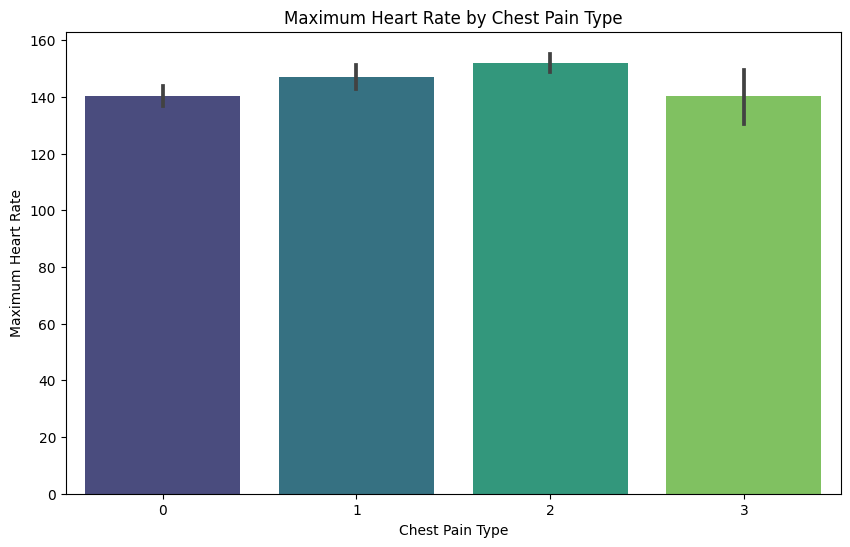

In [112]:
# Visualization:
plt.figure(figsize=(10, 6))
sns.barplot(x='chestpain', y='maxheartrate', data=df, palette='viridis')
plt.title('Maximum Heart Rate by Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.ylabel('Maximum Heart Rate')
plt.show()

In [113]:
average_resting_bp = df['restingBP'].mean()
print(f"Average Resting Blood Pressure: {average_resting_bp:.2f} mm Hg")

Average Resting Blood Pressure: 151.75 mm Hg


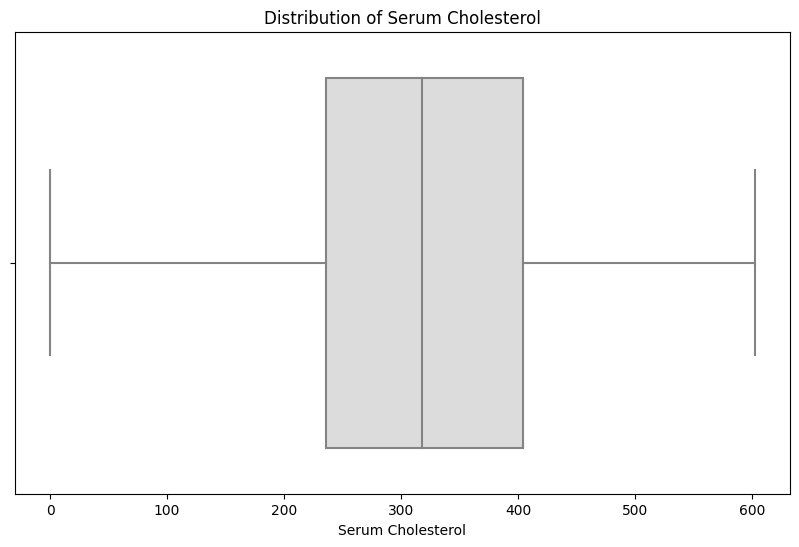

In [114]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='serumcholestrol', data=df, palette='coolwarm')
plt.title('Distribution of Serum Cholesterol')
plt.xlabel('Serum Cholesterol')
plt.show()

In [115]:
percentage_high_fasting_sugar = (df['fastingbloodsugar'].sum() / len(df)) * 100
print(f"Percentage of patients with fasting blood sugar > 120 mg/dl: {percentage_high_fasting_sugar:.2f}%")

Percentage of patients with fasting blood sugar > 120 mg/dl: 29.60%


In [116]:
resting_electro_counts = df['restingrelectro'].value_counts()
print(resting_electro_counts)

0    454
1    344
2    202
Name: restingrelectro, dtype: int64


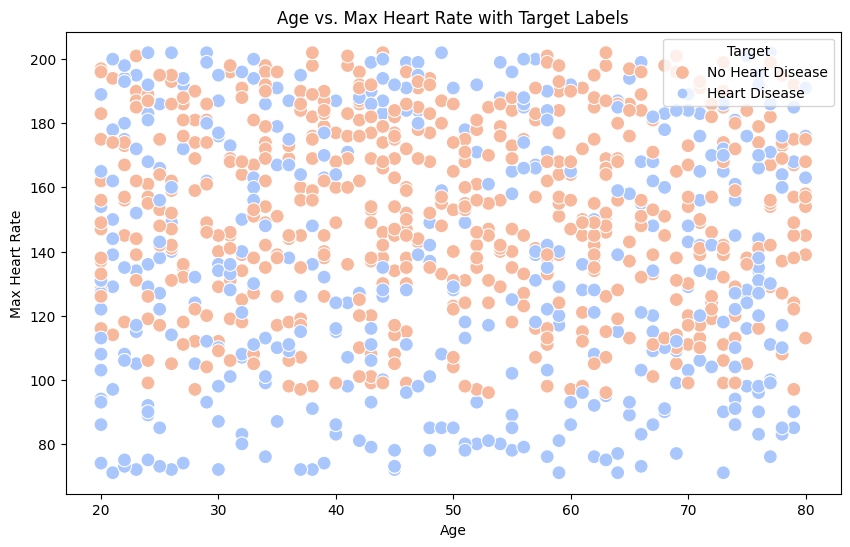

In [117]:
# Visualization:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='maxheartrate', hue='target', data=df, palette='coolwarm', s=100)
plt.title('Age vs. Max Heart Rate with Target Labels')
plt.xlabel('Age')
plt.ylabel('Max Heart Rate')
plt.legend(title='Target', loc='upper right', labels=['No Heart Disease', 'Heart Disease'])
plt.show()

In [118]:
average_max_heart_rate = df['maxheartrate'].mean()
print(f"Average Maximum Heart Rate: {average_max_heart_rate:.2f}")

Average Maximum Heart Rate: 145.48


In [119]:
exercise_angina_count = df['exerciseangia'].sum()
print(f"Number of Patients with Exercise-Induced Angina: {exercise_angina_count}")

Number of Patients with Exercise-Induced Angina: 498


In [120]:
average_oldpeak = df['oldpeak'].mean()
print(f"Average Oldpeak: {average_oldpeak:.2f}")

Average Oldpeak: 2.71


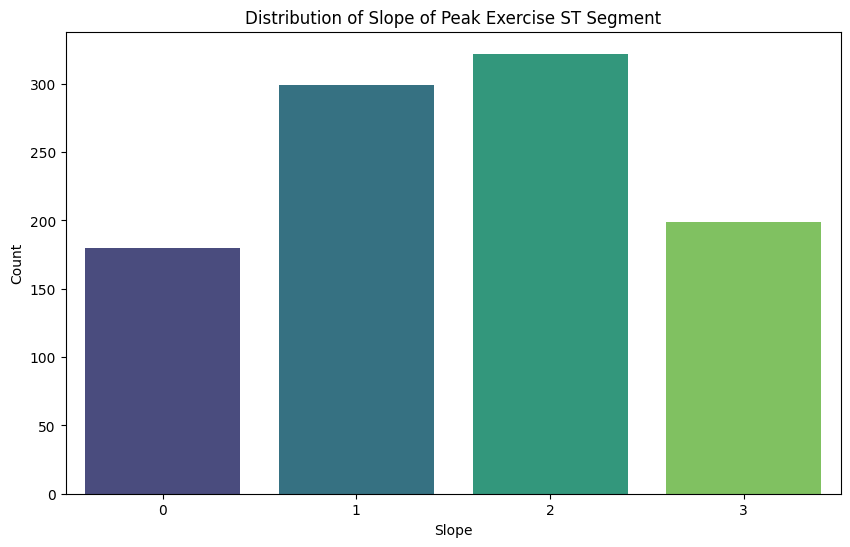

In [121]:
plt.figure(figsize=(10, 6))
sns.countplot(x='slope', data=df, palette='viridis')
plt.title('Distribution of Slope of Peak Exercise ST Segment')
plt.xlabel('Slope')
plt.ylabel('Count')
plt.show()

In [122]:
vessels_range = f"Number of Major Vessels Range: {df['noofmajorvessels'].min()} - {df['noofmajorvessels'].max()}"
print(vessels_range)

Number of Major Vessels Range: 0 - 3


In [123]:
percentage_heart_disease = (df['target'].sum() / len(df)) * 100
print(f"Percentage of Patients with Heart Disease: {percentage_heart_disease:.2f}%")

Percentage of Patients with Heart Disease: 58.00%


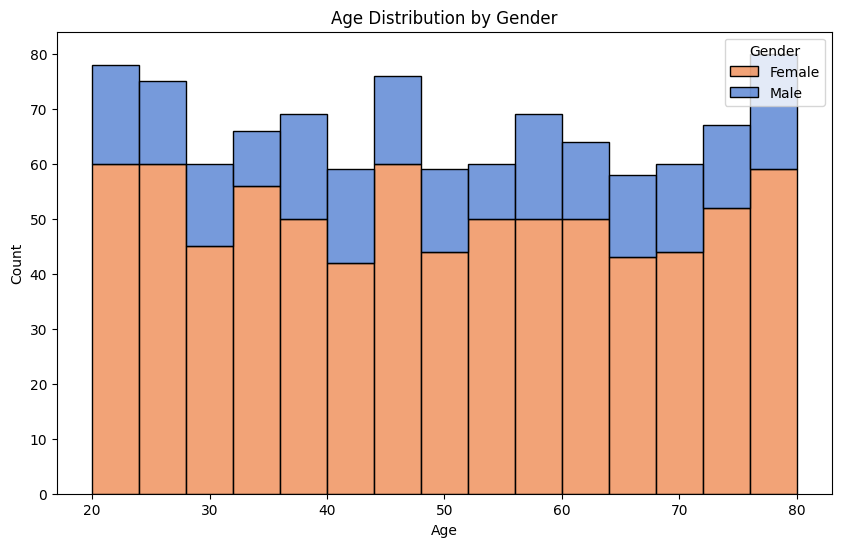

In [124]:
# Visualization:
plt.figure(figsize=(10, 6))
sns.histplot(x='age', hue='gender', data=df, palette='muted', multiple='stack', bins=15)
plt.title('Age Distribution by Gender')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Gender', labels=['Female', 'Male'])
plt.show()

In [125]:
oldest_patient = df.loc[df['age'].idxmax()]
print(f"Details of the Oldest Patient:\n{oldest_patient}")

Details of the Oldest Patient:
patientid            1160678.0
age                       80.0
gender                     1.0
chestpain                  1.0
restingBP                130.0
serumcholestrol          342.0
fastingbloodsugar          0.0
restingrelectro            0.0
maxheartrate             176.0
exerciseangia              1.0
oldpeak                    2.5
slope                      0.0
noofmajorvessels           0.0
target                     0.0
Name: 102, dtype: float64


In [126]:
lowest_bp_patient = df.loc[df['restingBP'].idxmin()]
print(f"Details of the Patient with the Lowest Resting Blood Pressure:\n{lowest_bp_patient}")

Details of the Patient with the Lowest Resting Blood Pressure:
patientid            119250.0
age                      40.0
gender                    1.0
chestpain                 0.0
restingBP                94.0
serumcholestrol         229.0
fastingbloodsugar         0.0
restingrelectro           1.0
maxheartrate            115.0
exerciseangia             0.0
oldpeak                   3.7
slope                     1.0
noofmajorvessels          1.0
target                    0.0
Name: 1, dtype: float64


In [127]:
correlation_age_maxheartrate = df['age'].corr(df['maxheartrate'])
print(f"Correlation between Age and Maximum Heart Rate: {correlation_age_maxheartrate:.2f}")

Correlation between Age and Maximum Heart Rate: -0.04


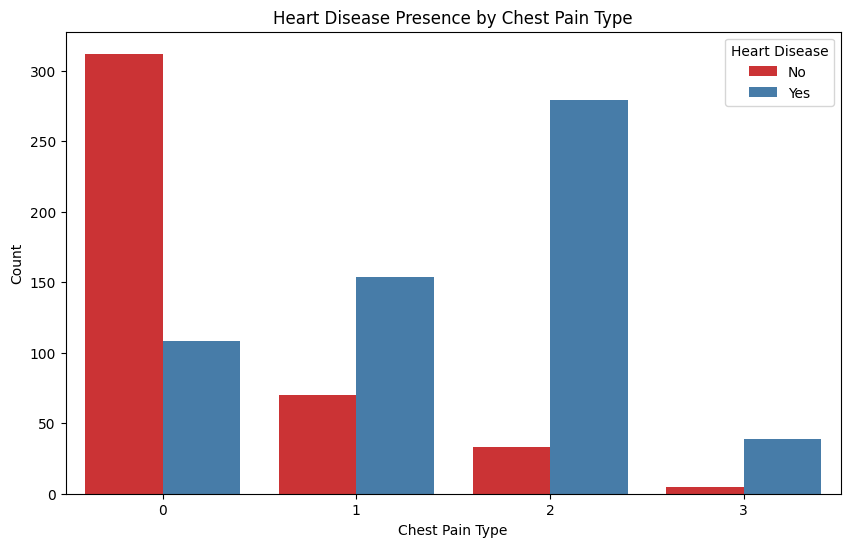

In [128]:
plt.figure(figsize=(10, 6))
sns.countplot(x='chestpain', hue='target', data=df, palette='Set1')
plt.title('Heart Disease Presence by Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.legend(title='Heart Disease', labels=['No', 'Yes'])
plt.show()

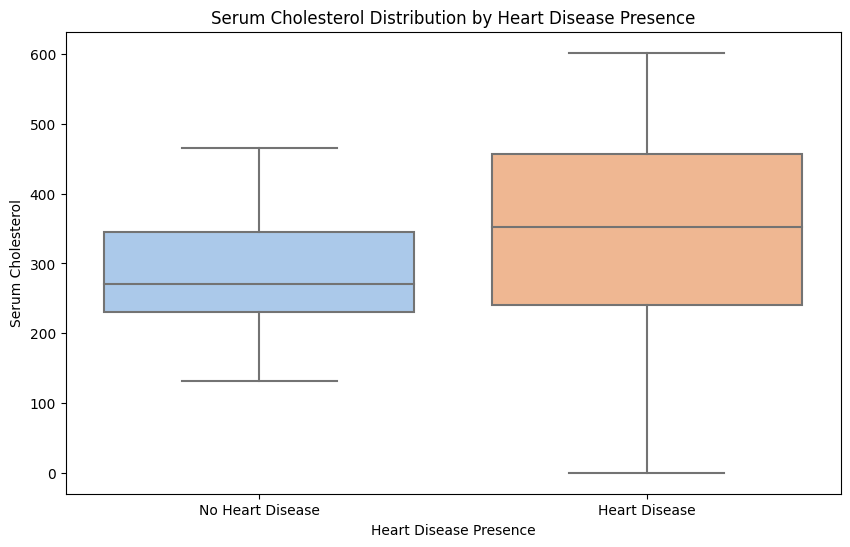

In [129]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='target', y='serumcholestrol', data=df, palette='pastel')
plt.title('Serum Cholesterol Distribution by Heart Disease Presence')
plt.xlabel('Heart Disease Presence')
plt.ylabel('Serum Cholesterol')
plt.xticks(ticks=[0, 1], labels=['No Heart Disease', 'Heart Disease'])
plt.show()

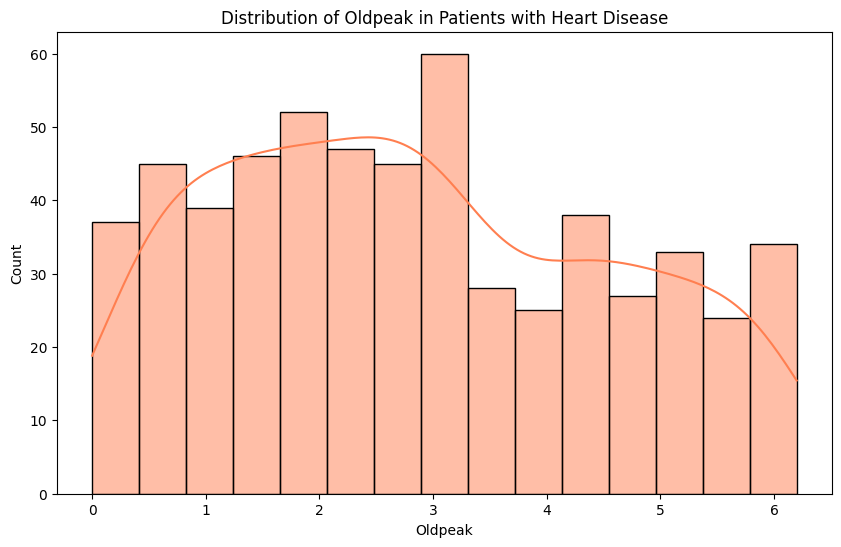

In [130]:
plt.figure(figsize=(10, 6))
sns.histplot(x='oldpeak', data=df[df['target'] == 1], bins=15, kde=True, color='coral')
plt.title('Distribution of Oldpeak in Patients with Heart Disease')
plt.xlabel('Oldpeak')
plt.ylabel('Count')
plt.show()

In [131]:
defects_count = len(df[df['noofmajorvessels'] == 3])
print(f"Number of Patients with Defects in All Three Major Vessels: {defects_count}")

Number of Patients with Defects in All Three Major Vessels: 116


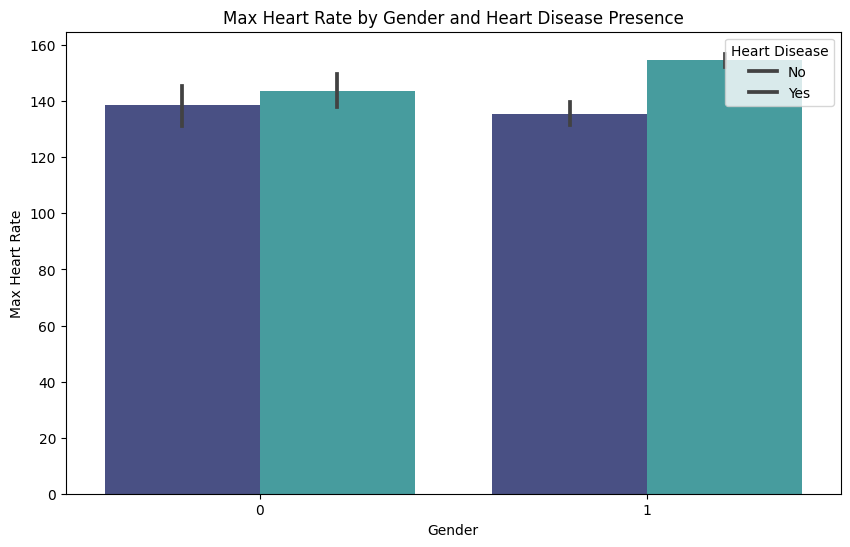

In [132]:
# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(x='gender', y='maxheartrate', hue='target', data=df, palette='mako')
plt.title('Max Heart Rate by Gender and Heart Disease Presence')
plt.xlabel('Gender')
plt.ylabel('Max Heart Rate')
plt.legend(title='Heart Disease', labels=['No', 'Yes'])
plt.show()

In [133]:
# target classes :
df.target.unique()

array([1, 0])

In [134]:
df = df.replace({'target' : {
                                    0 : 'Absence of Heart Disease',
                                    1 : 'Presence of Heart Disease',
        }}
)

In [135]:
df.head()

,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
0,103368,53,1,2,171,0,0,1,147,0,5.3,3,3,Presence of Heart Disease
1,119250,40,1,0,94,229,0,1,115,0,3.7,1,1,Absence of Heart Disease
2,119372,49,1,2,133,142,0,0,202,1,5.0,1,0,Absence of Heart Disease
3,132514,43,1,0,138,295,1,1,153,0,3.2,2,2,Presence of Heart Disease
4,146211,31,1,1,199,0,0,2,136,0,5.3,3,2,Presence of Heart Disease


In [136]:
# Create X from DataFrame and y as Target
X_disease = df.drop(columns='target')
y = df.target

In [137]:
scaler = MinMaxScaler(feature_range=(0, 1)).fit_transform(X_disease)
X = pd.DataFrame(scaler, columns=X_disease.columns)
X.describe().T.style.background_gradient(axis=0, cmap='plasma')

,count,mean,std,min,25%,50%,75%,max
patientid,1000.000000,0.500161,0.292886,0.000000,0.246076,0.490432,0.766475,1.000000
age,1000.000000,0.487367,0.297746,0.000000,0.233333,0.483333,0.737500,1.000000
gender,1000.000000,0.765000,0.424211,0.000000,1.000000,1.000000,1.000000,1.000000
chestpain,1000.000000,0.326667,0.317719,0.000000,0.000000,0.333333,0.666667,1.000000
restingBP,1000.000000,0.544783,0.282691,0.000000,0.330189,0.500000,0.820755,1.000000
serumcholestrol,1000.000000,0.517354,0.220006,0.000000,0.391611,0.528239,0.671512,1.000000
fastingbloodsugar,1000.000000,0.296000,0.456719,0.000000,0.000000,0.000000,1.000000,1.000000
restingrelectro,1000.000000,0.374000,0.385061,0.000000,0.000000,0.500000,0.500000,1.000000
maxheartrate,1000.000000,0.568527,0.260994,0.000000,0.372137,0.572519,0.793893,1.000000
exerciseangia,1000.000000,0.498000,0.500246,0.000000,0.000000,0.000000,1.000000,1.000000


In [138]:
# Define a function to ploting Confusion matrix
def plot_confusion_matrix(y_test, y_prediction):
    '''Plotting Confusion Matrix'''
    cm = metrics.confusion_matrix(y_test, y_prediction)
    ax = plt.subplot()
    ax = sns.heatmap(cm, annot=True, fmt='', cmap="plasma")
    ax.set_xlabel('Predicted labels', fontsize=18)
    ax.set_ylabel('True labels', fontsize=18)
    ax.set_title('Confusion Matrix', fontsize=25)
    ax.xaxis.set_ticklabels(['Absence of Heart Disease','Presence of Heart Disease'])
    ax.yaxis.set_ticklabels(['Absence of Heart Disease','Presence of Heart Disease'])
    plt.show()

In [139]:
# Define a function to ploting Classification report
def clfr_plot(y_test, y_pred) :
    ''' Plotting Classification report'''
    cr = pd.DataFrame(metrics.classification_report(y_test, y_pred_rf, digits=3,
                                            output_dict=True)).T
    cr.drop(columns='support', inplace=True)
    sns.heatmap(cr, cmap='plasma', annot=True, linecolor='white', linewidths=0.5).xaxis.tick_top()

In [140]:
def clf_plot(y_pred) :
    '''
    1) Ploting Confusion Matrix
    2) Plotting Classification Report'''
    cm = metrics.confusion_matrix(y_test, y_pred)
    cr = pd.DataFrame(metrics.classification_report(y_test, y_pred, digits=3, output_dict=True)).T
    cr.drop(columns='support', inplace=True)

    fig, ax = plt.subplots(1, 2, figsize=(15, 5))

    # Left: Confusion Matrix
    ax[0] = sns.heatmap(cm, annot=True, fmt='', cmap="plasma", ax=ax[0])
    ax[0].set_xlabel('Predicted labels', fontsize=18)
    ax[0].set_ylabel('True labels', fontsize=18)
    ax[0].set_title('Confusion Matrix', fontsize=25)
    ax[0].xaxis.set_ticklabels(['Absence of Heart Disease','Presence of Heart Disease'])
    ax[0].yaxis.set_ticklabels(['Absence of Heart Disease','Presence of Heart Disease'])

    # Right: Classification Report
    ax[1] = sns.heatmap(cr, cmap='plasma', annot=True, linecolor='white', linewidths=0.5, ax=ax[1])
    ax[1].xaxis.tick_top()
    ax[1].set_title('Classification Report', fontsize=25)
    plt.show()

In [141]:
df.target.value_counts()

Presence of Heart Disease    580
Absence of Heart Disease     420
Name: target, dtype: int64

In [142]:
# Splite Dataframe
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [143]:
# Dictionary to define parameters to test in algorithm
parameters = {
    'n_estimators' : [50, 150, 500],
    'criterion' : ['gini', 'entropy', 'log_loss'],
    'max_features' : ['sqrt', 'log2']
}

rf = RandomForestClassifier(n_jobs=-1)
rf_cv = GridSearchCV(estimator=rf, cv=20, param_grid=parameters).fit(X_train, y_train)

print('Tuned hyper parameters : ', rf_cv.best_params_)
print('accuracy : ', rf_cv.best_score_)

Tuned hyper parameters :  {'criterion': 'log_loss', 'max_features': 'sqrt', 'n_estimators': 500}
accuracy :  0.9787339971550498


In [144]:
# Model :
rf = RandomForestClassifier(**rf_cv.best_params_).fit(X_train, y_train)

In [145]:
y_pred_rf = rf.predict(X_test)

rf_score = round(rf.score(X_test, y_test), 3)
print('RandomForestClassifier score : ', rf_score)

RandomForestClassifier score :  0.98


In [146]:
y_test.value_counts()

Presence of Heart Disease    132
Absence of Heart Disease     118
Name: target, dtype: int64

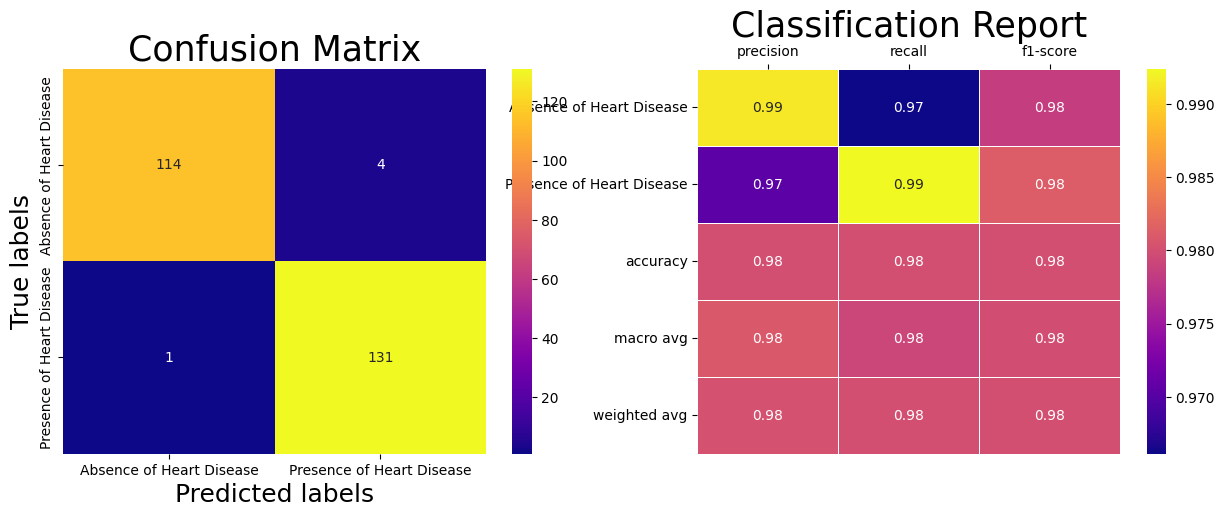

In [147]:
clf_plot(y_pred_rf)

In [148]:
# Dictionary to define parameters to test in algorithm
parameters = {
    'C' : [0.001, 0.01, 0.1, 1.0, 10, 100, 1000],
    'class_weight' : ['balanced'],
    'solver' : ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
}

lr = LogisticRegression()
lr_cv = GridSearchCV(estimator=lr, param_grid=parameters, cv=10).fit(X_train, y_train)

print('Tuned hyper parameters : ', lr_cv.best_params_)
print('accuracy : ', lr_cv.best_score_)

Tuned hyper parameters :  {'C': 10, 'class_weight': 'balanced', 'solver': 'lbfgs'}
accuracy :  0.96


In [149]:
lr = LogisticRegression(**lr_cv.best_params_).fit(X_train, y_train)

In [150]:
y_pred_lr = lr.predict(X_test)

lr_score = round(lr.score(X_test, y_test), 3)
print('LogisticRegression score : ', lr_score)

LogisticRegression score :  0.976


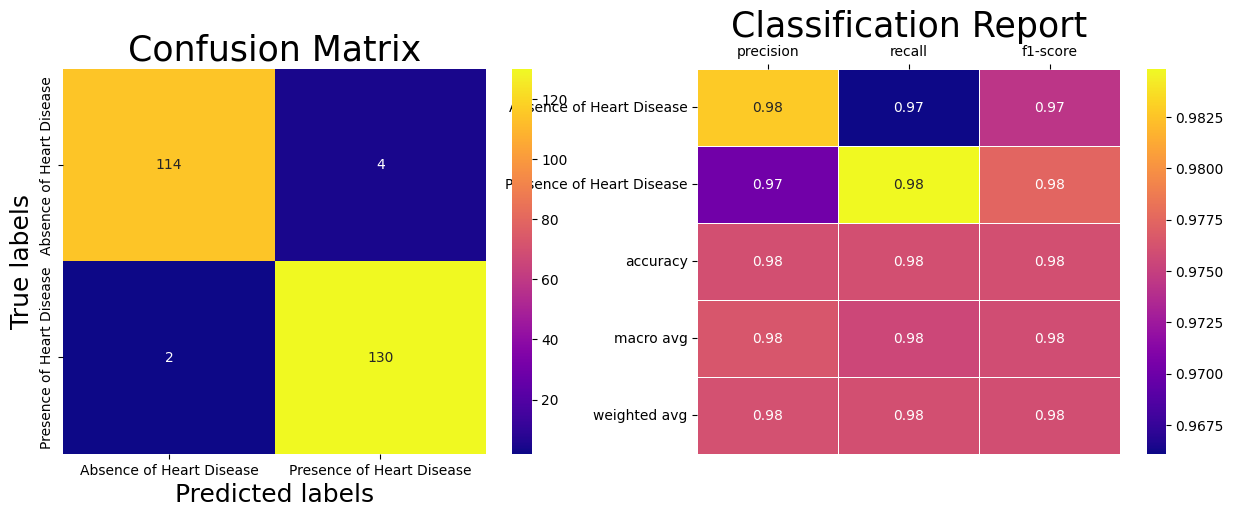

In [151]:
clf_plot(y_pred_lr)

In [152]:
# Dictionary to define parameters to test in algorithm
parameters = {
    'C' : [0.001, 0.01, 0.1, 1.0, 10, 100, 1000],
    'gamma' : [0.001, 0.01, 0.1, 1.0, 10, 100, 1000],
}

svc = SVC()
svc_cv = GridSearchCV(estimator=svc, param_grid=parameters, cv=10).fit(X_train, y_train)

print('Tuned hyper parameters : ', svc_cv.best_params_)
print('accuracy : ', svc_cv.best_score_)

Tuned hyper parameters :  {'C': 10, 'gamma': 0.1}
accuracy :  0.9626666666666667


In [153]:
# Model
svc = SVC(**svc_cv.best_params_).fit(X_train, y_train)

In [154]:
y_pred_svc = svc.predict(X_test)

svc_score = round(svc.score(X_test, y_test), 3)
print('SVC Score : ', svc_score)

SVC Score :  0.968


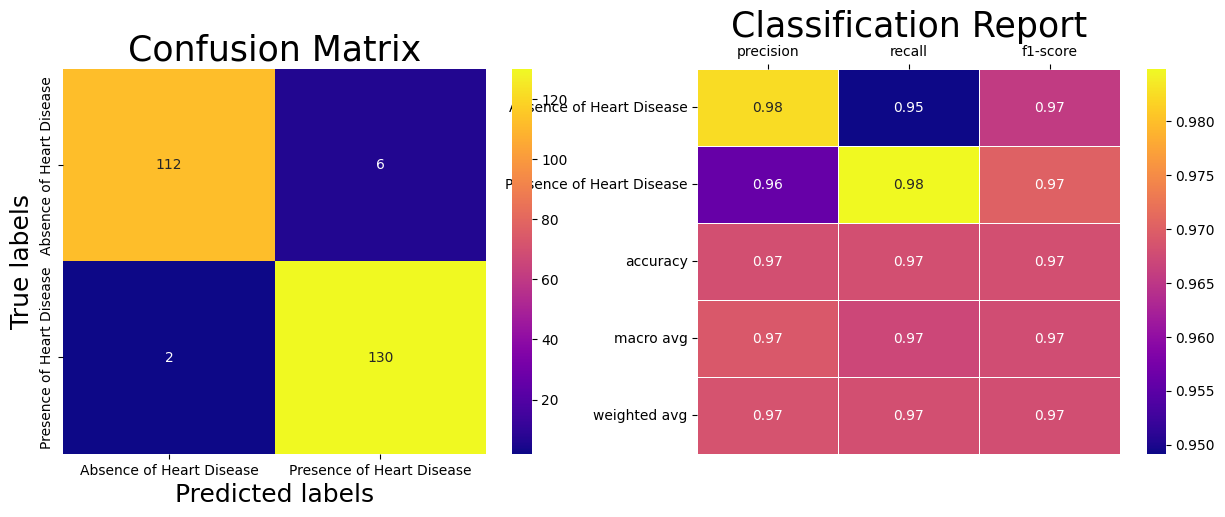

In [155]:
clf_plot(y_pred_svc)

In [156]:
# Dictionary to define parameters to test in algorithm
parameters = {
    'criterion' : ['gini', 'entropy', 'log_loss'],
    'splitter' : ['best', 'random'],
    'max_depth' : list(np.arange(4, 30, 1))
        }

tree = DecisionTreeClassifier()
tree_cv = GridSearchCV(estimator=tree, cv=10, param_grid=parameters).fit(X_train, y_train)


print('Tuned hyper parameters : ', tree_cv.best_params_)
print('accuracy : ', tree_cv.best_score_)

Tuned hyper parameters :  {'criterion': 'gini', 'max_depth': 25, 'splitter': 'random'}
accuracy :  0.9719999999999999


In [157]:
tree = DecisionTreeClassifier(**tree_cv.best_params_).fit(X_train, y_train)

In [158]:
y_pred_tree = tree.predict(X_test)

tree_score = round(tree.score(X_test, y_test), 3)
print('DecisionTreeClassifier Score : ', tree_score)

DecisionTreeClassifier Score :  0.944


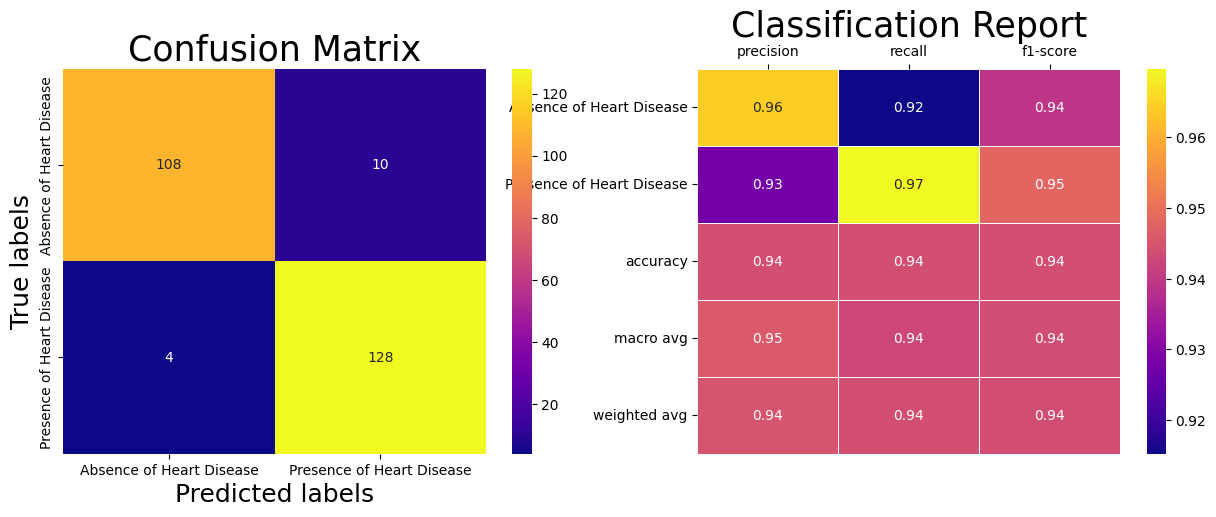

In [159]:
clf_plot(y_pred_tree)

In [160]:
# Dictionary to define parameters to test in algorithm
parameters = {
    'n_neighbors' : list(np.arange(3, 50, 2)),
    'weights': ['uniform', 'distance'],
    'p' : [1, 2, 3, 4]
}

knn = KNeighborsClassifier()
knn_cv = GridSearchCV(estimator=knn, cv=10, param_grid=parameters).fit(X_train, y_train)

print('Tuned hyper parameters : ', knn_cv.best_params_)
print('accuracy : ', knn_cv.best_score_)

Tuned hyper parameters :  {'n_neighbors': 7, 'p': 1, 'weights': 'distance'}
accuracy :  0.9479999999999998


In [161]:
knn = KNeighborsClassifier(**knn_cv.best_params_).fit(X_train, y_train)

In [162]:
y_pred_knn = knn_cv.predict(X_test)

knn_score = round(knn.score(X_test, y_test), 3)
print('KNeighborsClassifier Score :', knn_score)

KNeighborsClassifier Score : 0.96


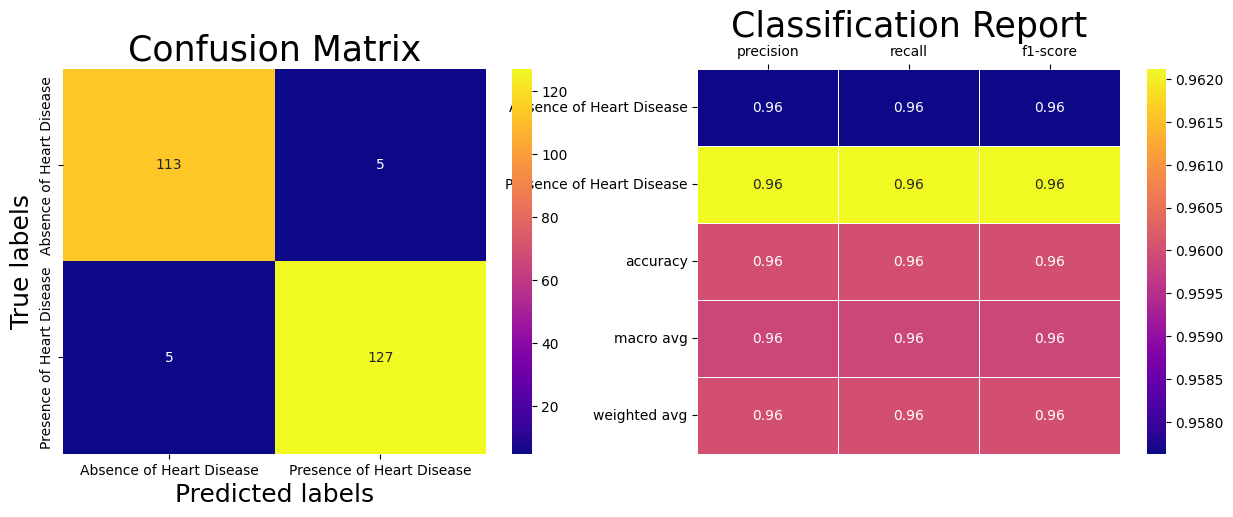

In [163]:
clf_plot(y_pred_knn)

In [164]:
gnb = GaussianNB().fit(X_train, y_train)
y_pred_gnb = gnb.predict(X_test)
gnb_score = round(gnb.score(X_test, y_test), 3)
print('GNB Score :', gnb_score)

GNB Score : 0.948


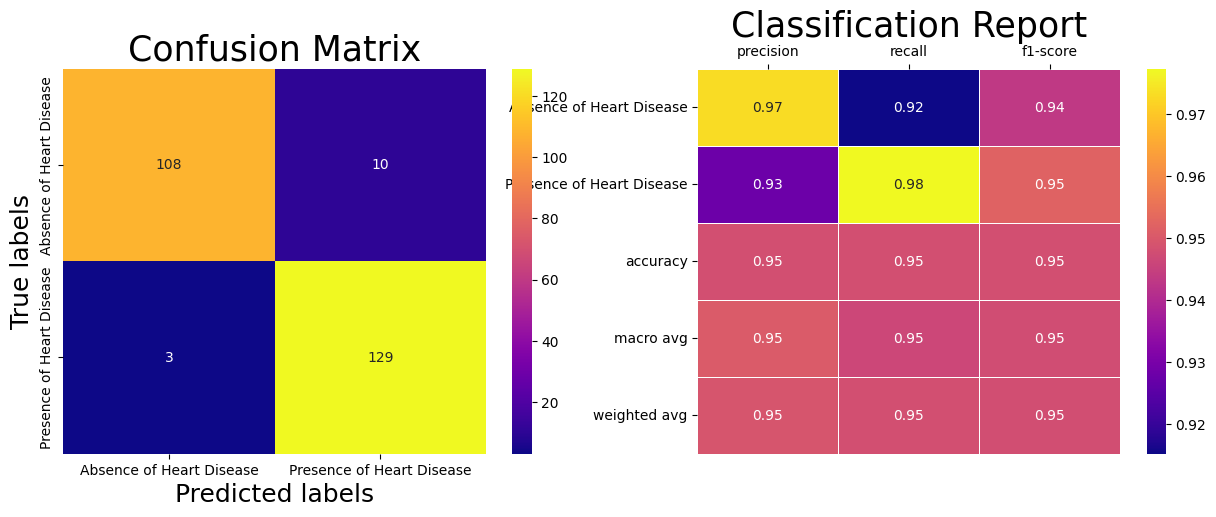

In [165]:
clf_plot(y_pred_gnb)

In [166]:
result = pd.DataFrame({
    'Algorithm' : ['RandomForestClassifier', 'LogisticRegression', 'SVC', 'DecisionTreeClassifier', 'KNeighborsClassifier', 'GaussianNB'],
    'Score' : [rf_score, lr_score, svc_score, tree_score, knn_score, gnb_score]
})

result.sort_values(by='Score', inplace=True)

In [167]:
sns.set_palette("plasma")

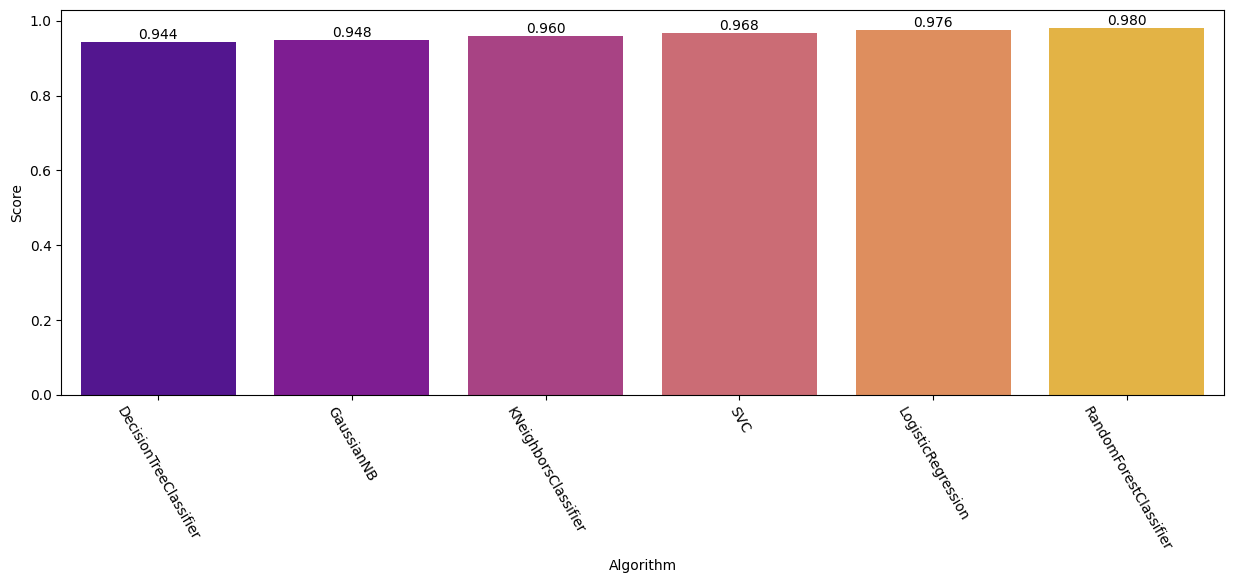

In [168]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))

sns.barplot(x='Algorithm', y='Score', data=result)
ax.bar_label(ax.containers[0], fmt='%.3f')
ax.set_xticklabels(labels=result.Algorithm, rotation=300)
plt.show()

In [169]:
# Model
rf = RandomForestClassifier(**rf_cv.best_params_)

In [170]:
rf.fit(X, y)

RandomForestClassifier(criterion='log_loss', n_estimators=500)

In [171]:
'''input_data = (119372,	49,	1,	2,	133,	142,	0,	0,	202,	1,	5.0,	1,	0)

input_data_as_numpy_array = np.asarray(input_data)

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

input_data_std = scaler.transform(input_data_reshaped)

prediction = rf.predict(input_data_std)
print(prediction)

prediction_label = [np.argmax(prediction)]
print(prediction_label)

if(prediction_label[0] == 0):
  print('Absence of Heart Disease')

else:
  print('Presence of Heart Disease')

SyntaxError: ignored